In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/student_data.csv')

In [ ]:
df.shape

(10000, 6)

In [ ]:
df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Duration of Sleep,Sample Question Papers Practiced,Performance
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66
5,3,78,No,9,6,61
6,7,73,Yes,5,6,63
7,8,45,Yes,4,6,42
8,5,77,No,8,2,61
9,4,89,No,4,0,69


In [ ]:
# To find null if any null value exist
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Duration of Sleep                   0
Sample Question Papers Practiced    0
Performance                         0
dtype: int64

In [ ]:
# to find data type of each attribute.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Duration of Sleep                 10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance                       10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


In [ ]:
df.describe()

,Hours Studied,Previous Scores,Duration of Sleep,Sample Question Papers Practiced,Performance
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
correlation_matrix = df.corr()

<ipython-input-10-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

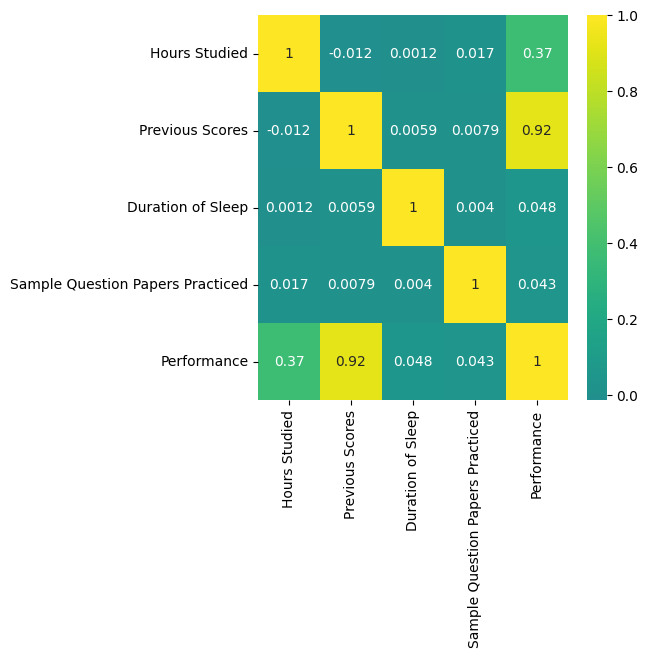

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0)

<ipython-input-12-ab0f3e157824>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Performance'],shade=True)


<function matplotlib.pyplot.show(close=None, block=None)>

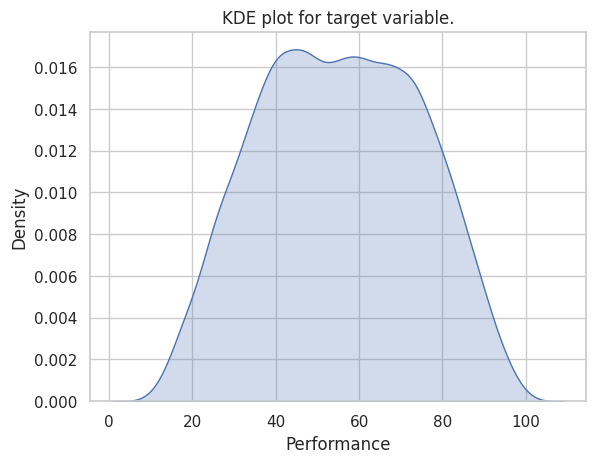

In [ ]:
#kernal density plot of target variable
sns.set(style="whitegrid")
sns.kdeplot(df['Performance'],shade=True)
plt.xlabel("Performance")
plt.ylabel("Density")
plt.title("KDE plot for target variable.")
plt.show

In [ ]:
skewness = df['Performance'].skew()
skewness

-0.0017400273072201125

In [ ]:
kurtosis = df['Performance'].kurtosis()
kurtosis

-0.8605230998210018

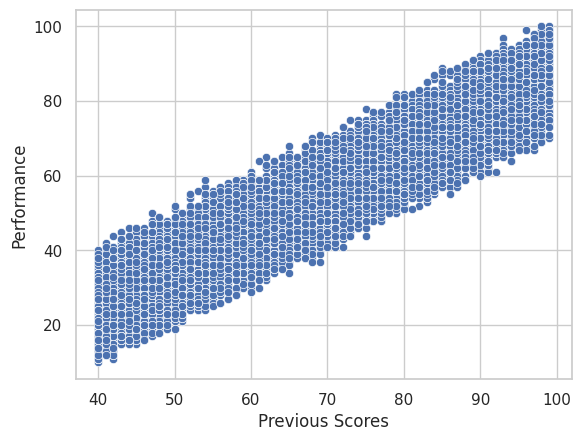

In [ ]:
sns.scatterplot(x=df['Previous Scores'],y=df['Performance'])
plt.show()

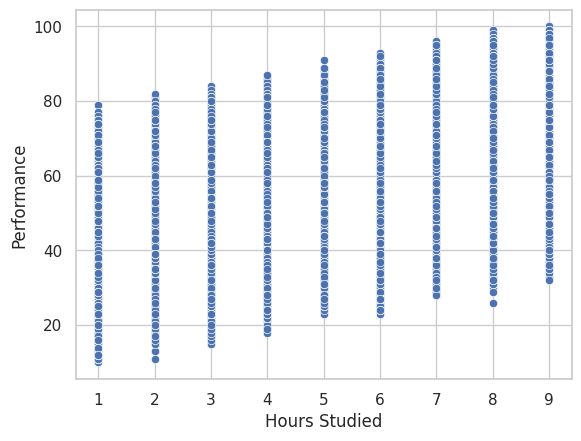

In [ ]:
sns.scatterplot(x=df['Hours Studied'],y=df['Performance'])
plt.show()

<Axes: >

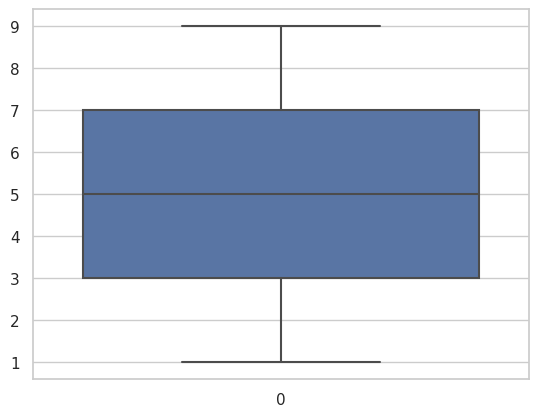

In [ ]:
sns.boxplot(df['Hours Studied'])

#plt.xlabel('Hours Studied')

<Axes: >

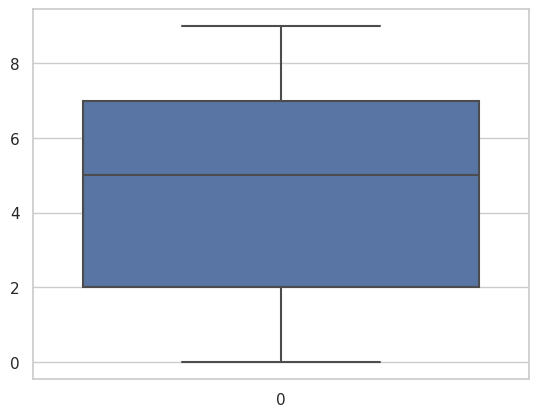

In [ ]:
sns.boxplot(df['Sample Question Papers Practiced'])

#plt.xlabel('Sample Question Papers Practiced')

<Axes: >

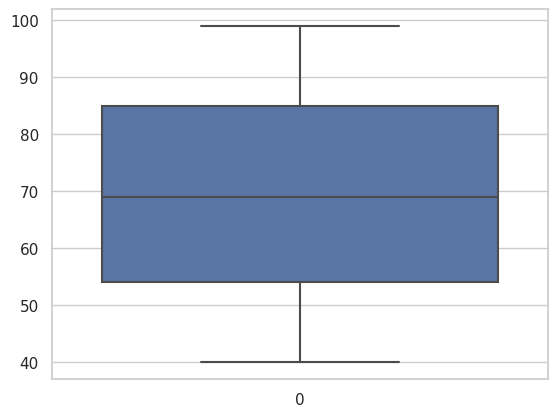

In [ ]:
#plt.boxplot(df['Previous Scores'])
#plt.xlabel('Previous Scores')
sns.boxplot(df['Previous Scores'])

<Axes: >

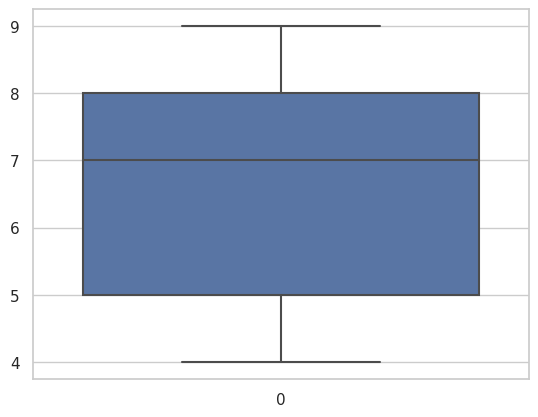

In [ ]:
sns.boxplot(df['Duration of Sleep'])


<Axes: >

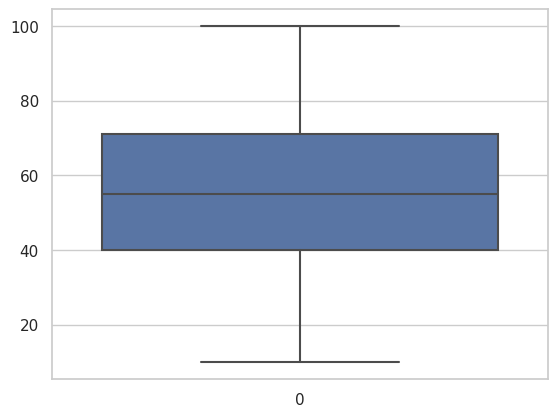

In [ ]:

sns.boxplot(df['Performance'])

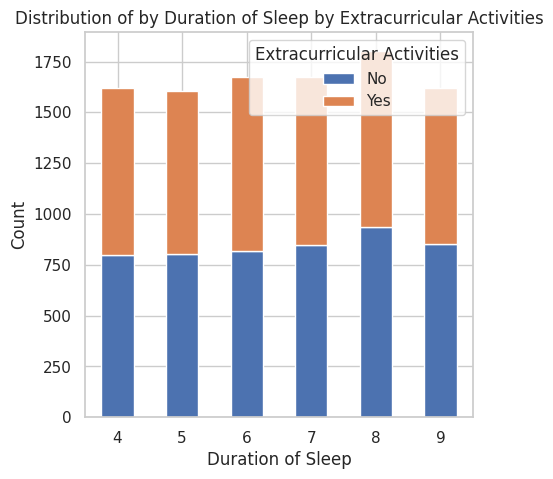

In [ ]:
df_sleep=df.groupby(['Duration of Sleep', 'Extracurricular Activities']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(5, 5))
df_sleep.plot(kind='bar', stacked=True, ax=ax)

plt.xlabel('Duration of Sleep')
plt.ylabel('Count')
plt.title('Distribution of by Duration of Sleep by Extracurricular Activities')
plt.xticks(rotation=0)
plt.legend(title='Extracurricular Activities')

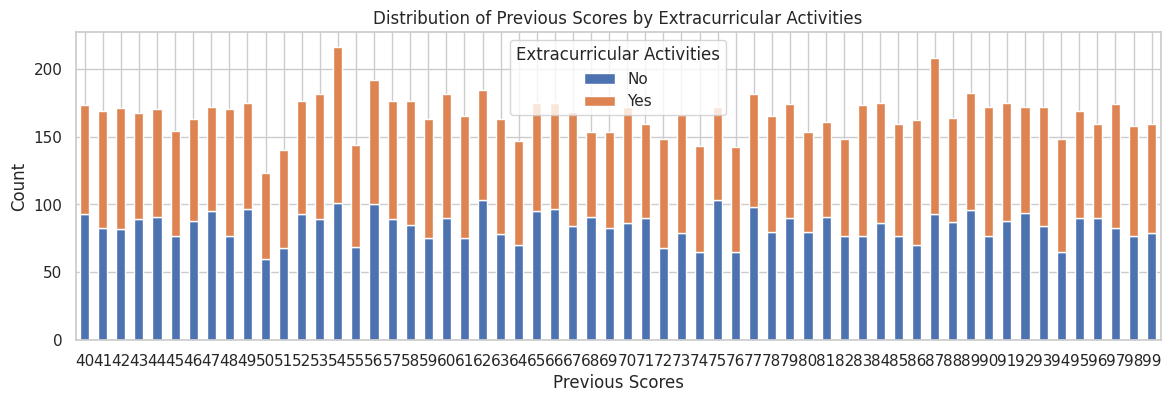

In [ ]:
df_score=df.groupby(['Previous Scores', 'Extracurricular Activities']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(14, 4))
df_score.plot(kind='bar', stacked=True, ax=ax)

plt.xlabel('Previous Scores')
plt.ylabel('Count')
plt.title('Distribution of Previous Scores by Extracurricular Activities')
plt.xticks(rotation=0)
plt.legend(title='Extracurricular Activities')

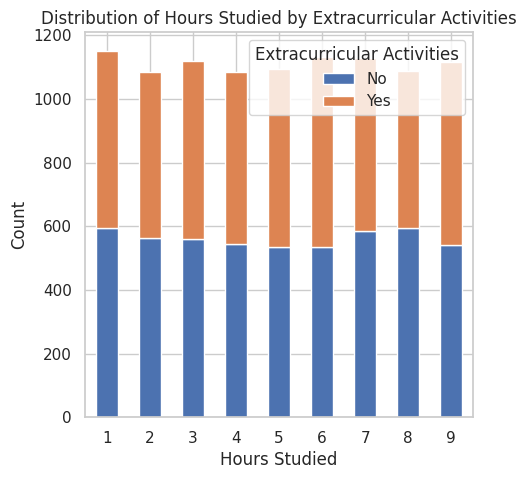

In [ ]:
df_hours=df.groupby(['Hours Studied', 'Extracurricular Activities']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(5, 5))
df_hours.plot(kind='bar', stacked=True, ax=ax)

plt.xlabel('Hours Studied')
plt.ylabel('Count')
plt.title('Distribution of Hours Studied by Extracurricular Activities')
plt.xticks(rotation=0)
plt.legend(title='Extracurricular Activities')

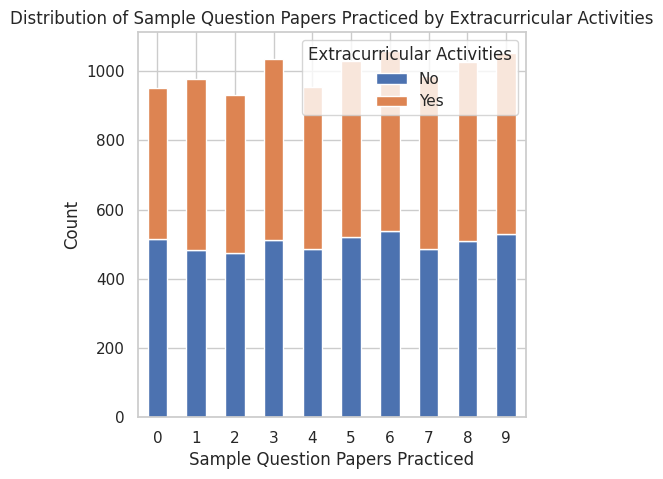

In [ ]:
df_question=df.groupby(['Sample Question Papers Practiced', 'Extracurricular Activities']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(5, 5))
df_question.plot(kind='bar', stacked=True, ax=ax)

plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Count')
plt.title('Distribution of Sample Question Papers Practiced by Extracurricular Activities')
plt.xticks(rotation=0)
plt.legend(title='Extracurricular Activities')

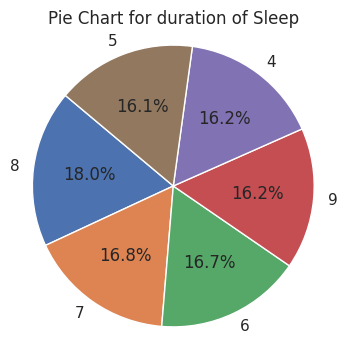

In [ ]:
sleep_count = df['Duration of Sleep'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(sleep_count, labels=sleep_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart for duration of Sleep')
plt.axis('equal')

plt.show()

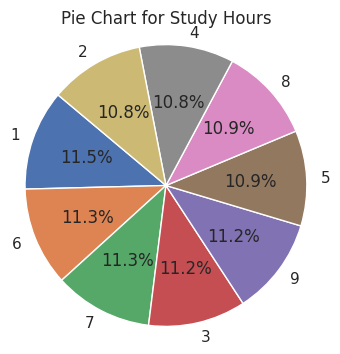

In [ ]:
studyhrs_count = df['Hours Studied'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(studyhrs_count, labels=studyhrs_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart for Study Hours')
plt.axis('equal')

plt.show()

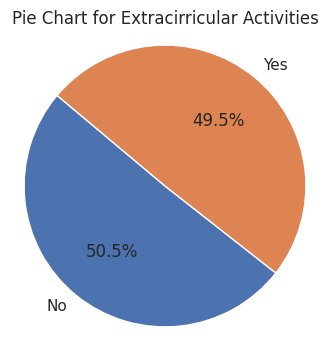

In [ ]:
extra_count = df['Extracurricular Activities'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(extra_count, labels=extra_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart for Extracirricular Activities')
plt.axis('equal')

plt.show()

# Spliting Data Into Train and Test

In [ ]:
catvar=['Extracurricular Activities']
data=pd.get_dummies(df, columns=catvar, drop_first=False)

In [ ]:
Attributes = data[['Hours Studied','Previous Scores','Extracurricular Activities_No','Extracurricular Activities_Yes','Duration of Sleep','Sample Question Papers Practiced']]
Target = data['Performance']

In [ ]:
 Attributes_train, Attributes_test, Target_train, Target_test = train_test_split(Attributes,Target, test_size=0.2, train_size=0.8, random_state=None, shuffle=True, stratify=None)

In [ ]:
Target_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 8000 entries, 1868 to 2145
Series name: Performance
Non-Null Count  Dtype
--------------  -----
8000 non-null   int64
dtypes: int64(1)
memory usage: 125.0 KB


# Python code for Linear Regression

In [ ]:
X=Attributes_train[['Hours Studied','Previous Scores','Extracurricular Activities_No','Extracurricular Activities_Yes','Duration of Sleep','Sample Question Papers Practiced']].values
Y=Target_train.values

In [ ]:
len(X)

8000

In [ ]:
learning_rate = 0.0001
max_iterations = 10000
t=0
Loss=[]
# to count number of columns or attributes
Total_attributes = X.shape[1]

# to initialise theta i to zeros
theta_i = np.zeros(Total_attributes + 1)
theta_j=theta_i[1:]
theta_not=theta_i[0]


In [ ]:
for t in range(max_iterations):
    h_theta = np.dot(X,theta_j) + theta_not #predicted
    J_theta=(np.mean((h_theta- Y) ** 2))/2   #Loss
    Loss.append(J_theta)

    deviation = h_theta - Y

    diff_theta_j= np.dot(X.T, deviation) / len(Y)
    diff_theta_not= np.mean(deviation)

    theta_j -= learning_rate * diff_theta_j
    theta_not -= learning_rate * diff_theta_not

 # parameters theta _i

print("theta :", theta_j)
print("Intercept :", theta_not)

theta : [ 2.17417142  0.82248901 -0.55297795 -0.35665065 -1.43032752 -0.26631702]
Intercept : -0.9096285969163607


In [ ]:
Y_predicted= np.dot(X,theta_j)+theta_not
#print(y_predicted)

print(Y[10], Y_predicted[10])

67 70.63111471076347


Scatter Plot

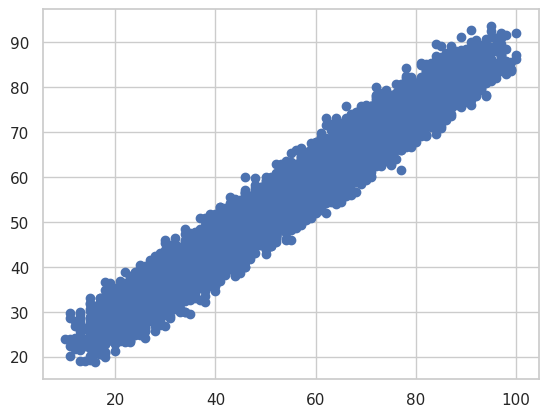

In [ ]:
plt.scatter(Y, h_theta)

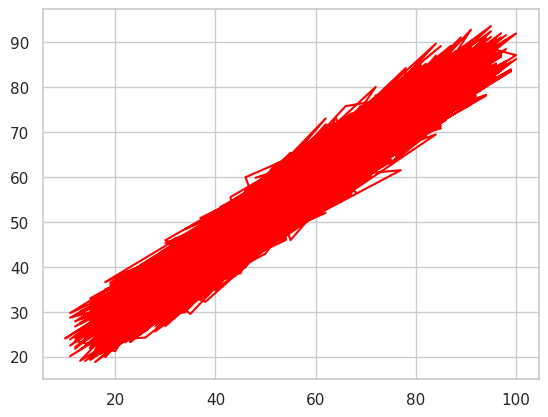

In [ ]:
plt.plot(Y, h_theta, color='red', label='Linear Regression Line')

Residual Plot

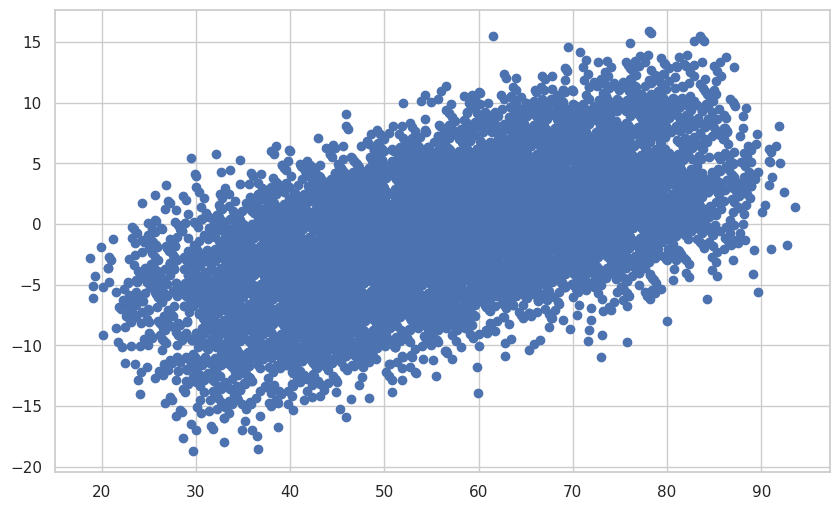

In [ ]:
residuals = Y -h_theta
plt.figure(figsize=(10, 6))
plt.scatter(Y_predicted, residuals)

# Loss vs Epoch Curve

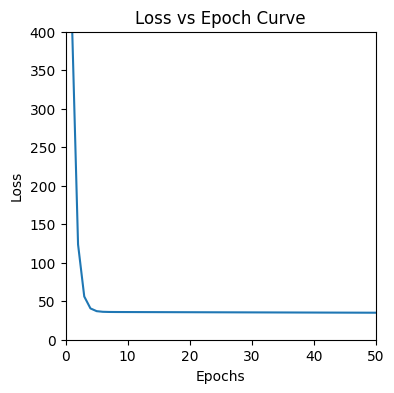

In [ ]:
plt.figure(figsize=(4, 4))

plt.plot(range(max_iterations), Loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epoch Curve')

plt.xlim(0,50)
plt.ylim(0,400)
plt.show()

# Results for [Hours of study = 7, Previous score = 95, Extracurricular Activities =Yes, Duration of Sleep = 7, Sample Question Papers Practiced = 6]

In [ ]:
X_input=np.array([7,95,0,1,7,6])
Prediction=np.dot(X_input, theta_j)+theta_not

In [ ]:
#required predicted value
Prediction

80.47918143704858

# model’s performance on the test set

MSE

In [ ]:
X1=Attributes_test[['Hours Studied','Previous Scores','Extracurricular Activities_No','Extracurricular Activities_Yes','Duration of Sleep','Sample Question Papers Practiced']].values
Y1=Target_test.values

In [ ]:
TestY_prediction=np.dot(X1, theta_i[1:])+theta_not

In [ ]:
TestY_prediction

array([62.40274652, 76.82301598, 69.82297485, ..., 53.41224874,
       53.07812503, 45.36066455])

In [ ]:
#MSE
Error_MSE=np.mean((TestY_prediction -Y1)**2)

In [ ]:
Error_MSE

32.14323931973891

R^2= 1- sum of squared regression/ total sum of squares

In [ ]:
Squared_regression=np.sum((Y1-TestY_prediction)**2)

In [ ]:
mean_Y1=np.mean(Y1)
sum_ofsquares= np.sum((Y1-mean_Y1)**2)

In [ ]:
R_squared=1-(Squared_regression/sum_ofsquares)

In [ ]:
R_squared

0.9134061669976888